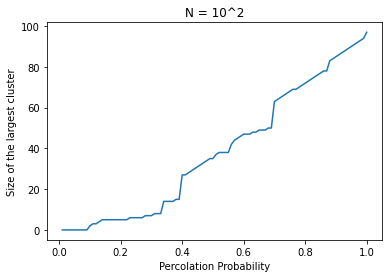

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

L=10
N=L**2
empty=-N-1

ptr=np.zeros(N, dtype=int)              # array of pointers
nn=np.zeros((N, 4), dtype=int)          # nearest neighbors
order=np.zeros(N, dtype=int)            # occupation order

def boundaries():
        for i in range(N):
              nn[i, 0]=(i+1)%N
              nn[i, 1]=(i+N-1)%N
              nn[i, 2]=(i+L)%N
              nn[i, 3]=(i+N-L)%N
              if i%L==0: 
                    nn[i, 1]=i+L-1
              if (i+1)%L==0:
                    nn[i, 0]=i-L+1

def permutation():
        j=0
        temp=0
        for i in range(N):
              order[i]=i
              for i in range(N):
                    j=int(i+(N-i)*random())
                    temp=np.copy(order[i])
                    order[i]=order[j]
                    order[j]=temp

def findroot(i):
        k=j=i
        while ptr[k]>0:
            ptr[j]=np.copy(ptr[k])
            j=k
            k=ptr[k]
        return k

def percolate():
        big=0
        X=[]
        Y=[]
        for i in range(N): 
              ptr[i]=empty
        for i in range(N):
              r1=s1=np.copy(order[i])
              ptr[s1]=-1    
              for j in range(4):
                    s2=np.copy(nn[s1, j])
                    if ptr[s2] != empty:
                          r2=findroot(s2)
                          if (r2!=r1):
                                if ptr[r1]>ptr[r2]:
                                       ptr[r2]=ptr[r2]+ptr[r1]
                                       ptr[r1]=r2
                                       r1=np.copy(r2)
                                else:
                                       ptr[r1]=ptr[r1]+ptr[r2]
                                       ptr[r2]=r1
                                if -ptr[r1]>big: 
                                       big=-np.copy(ptr[r1])
              X+=[(i+1.)/N, ]
              Y+=[big, ]
        plt.plot(X, Y, '-')
        plt.xlabel("Percolation Probability")
        plt.ylabel("Size of the largest cluster")
        plt.title("N = 10^2")
        plt.show()

boundaries()
permutation()
percolate()